<a href="https://colab.research.google.com/github/thaisflopes/modelo-de-previsao-de-entrega-de-refeicoes/blob/main/modelo_de_previsao_de_entrega_de_refeicoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Informações Iniciais

Descrição: Trata-se de um projeto para criação de um modelo que consiga prever a demanda futura de uma empresa de entrega de refeições que possui vários centros de atendimento em cidades diferentes, em que foram comparados quatro modelos (LinearRegression, DecisionTreeRegressor, RandomForestRegressor e XGBRegressor).

Projeto desenvolvido na disciplina Introdução à Aprendizagem De Máquina.

Elaborado em 07/11/2020 por Thaís Lopes (https://github.com/thaisflopes)   

## 1 Descrição do Problema

Em qualquer negócio é importante ter um bom planejamento a fim de evitar que o funcionamento da empresa seja afetado. No caso das empresas do segmento de alimentação, esse planejamento está ligado à capacidade produtiva necessária para atender a demanda e ao levantamento das quantidades certas de insumos e alimentos para o preparo das refeições. Em relação aos alimentos, deve-se considerar também que eles são perecíveis, assim, a fim de evitar desperdícios, muitas vezes é necessário que a compra seja realizada semanalmente ou até mesmo diariamente. Nesse sentido, a previsão da demanda auxilia os gestores nesse planejamento, pois por meio dela eles tem uma noção da quantidade de matéria-prima e de pessoal que eles precisarão para fornecer seu serviço com qualidade. 

Com base nisso, esse projeto analisará os dados de uma empresa de entrega de refeições que possui vários centros de atendimento em cidades diferentes. O problema consiste em achar um modelo que consiga prever a demanda futura da empresa, para ajudá-la a planejar seu estoque de matéria-prima.

## 2 Algoritmo

Para resolver o problema desse projeto serão usados alguns algoritmos supervisionados, visto que o objetivo é utilizar uma série histórica para prever a demanda futura. Assim, será utilizada a regressão linear (LinearRegression), por ser um algoritmo muito utilizado para realizar previsões com base em série histórica, e também serão utilizados alguns algoritmos que usam a lógica de árvore de decisão (DecisionTreeRegressor, RandomForestRegressor e XGBRegressor), pois costumam apresentar melhores resultados quando há dados binários no conjunto de dados. 

Os resultados obtidos em cada algoritmo serão comparados a fim de identificar o que melhor resolve o problema desse projeto.

## 3 Dataset

In [ ]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carregando as bases de dados
info_centros = pd.read_csv("fulfilment_center_info.csv")
info_refeicoes = pd.read_csv("meal_info.csv")
dados_teste = pd.read_csv("test.csv")
dados_treino = pd.read_csv("train.csv")

In [ ]:
info_centros.head()

center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [ ]:
info_refeicoes.head()

meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [ ]:
dados_treino.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [ ]:
dados_teste.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0

#### Significado de cada variável:

##### Base info_centros:

center_id: ID único para cada centro de distribuição

city_code: ID único para cada cidade

region_code: ID único para cada região

center_type: tipo de centro anônimo

op_area: área de operação (em km^2)

##### Base info_refeicoes:

meal_id: ID único para cada refeição

category: tipo de refeição

cuisine: cozinha da refeição

##### Bases dados_treino e dados_teste:

id: ID único

week: número da semana

center_id: ID único para cada centro de distribuição

meal_id: ID único para cada refeição

checkout_price: preço final incluindo desconto, impostos e taxa de entrega

base_price: preço base da refeição

emailer_for_promotion: email enviado para promoção da refeição

homepage_featured: refeição apresentada na página inicial

num_orders: contagem de pedidos (alvo)

## 4 Tratamento dos dados

### 4.1 Mesclando bases
As bases info_centros e dados_treino possuem a coluna "center_id" em comum. E as bases info_refeicoes e dados_treino possuem a coluna "meal_id" em comum. Assim, a seguir essas bases seram mescladas utilizando o pandas.DataFrame.merge para facilitar a manipulação e a análise dos dados.

In [ ]:
dados1 = pd.merge(dados_treino, info_centros, how='inner', on='center_id')
dados1.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                      0                  0         177        647   
1                      0                  0         270        647   
2                      0                  0         189        647   
3                      0                  0          54        647   
4                      0                  0          40        647   

   region_code center_type  op_area  
0           56      TYPE_C      2.0  
1           56      TYPE_C      2.0  
2           56      TYPE_C      2.0  
3           56      TYPE_C      2.0  
4           56      TYPE_C      2.0

In [ ]:
dados2 = pd.merge(dados1, info_refeicoes, how='inner', on='meal_id')
dados2.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1018704     2         55     1885          135.83      152.29   
2  1196273     3         55     1885          132.92      133.92   
3  1116527     4         55     1885          135.86      134.86   
4  1343872     5         55     1885          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                      0                  0         177        647   
1                      0                  0         323        647   
2                      0                  0          96        647   
3                      0                  0         163        647   
4                      0                  0         215        647   

   region_code center_type  op_area   category cuisine  
0           56      TYPE_C      2.0  Beverages    Thai  
1           56      TYPE_C      2.0  Beverages    Thai  
2           56      TYPE_C      2.0  Beverages    Thai  
3           56      TYPE_C      2.0  Beverages    Thai  
4           56      TYPE_C      2.0  Beverages    Thai

### 4.2 Removendo linhas duplicadas

In [ ]:
dados2.shape

(456548, 15)

In [ ]:
linhas_duplicadas_dados2 = dados2[dados2.duplicated()]
print("Número de linhas duplicadas: ", linhas_duplicadas_dados2.shape)

Número de linhas duplicadas:  (0, 15)


In [ ]:
dados_teste.shape

(32573, 8)

In [ ]:
linhas_duplicadas_dados_teste = dados_teste[dados_teste.duplicated()]
print("Número de linhas duplicadas: ", linhas_duplicadas_dados_teste.shape)

Número de linhas duplicadas:  (0, 8)


Os datasets não possuem linhas duplicadas.

### 4.3 Eliminando os valores ausentes ou nulos

In [ ]:
print(dados2.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64


In [ ]:
print(dados_teste.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64


Os datasets também não possuem dados ausentes.

### 4.4 Visualizando os dados

In [ ]:
for i in dados2.columns:
    print(i)
    print('Unique Values: '+str(len(dados2.groupby([i]).count())))
    print(dados2[i].value_counts())

id
Unique Values: 456548
1050623    1
1166483    1
1141895    1
1119368    1
1121417    1
          ..
1389043    1
1378804    1
1376757    1
1382902    1
1048576    1
Name: id, Length: 456548, dtype: int64
week
Unique Values: 145
122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: week, Length: 145, dtype: int64
center_id
Unique Values: 77
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64
meal_id
Unique Values: 51
2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     9853
2704     9811
1445   

Observa-se que:
- Os dados são registros de 145 semanas;
- Existem 77 ids de centros de distribuição;
- Existem 51 ids de refeições;
- Os centros estão em 51 cidades e 8 regiões;
- Existem 3 tipos de centros (A, B e C);
- Existem 30 tipos de área de operação;
- Existem 14 tipos de refeição; e
- As refeições são de 4 tipos de cozinhas.

In [ ]:
#Calculando a quantidade total de pedidos por semana
pedidos_por_semana = dados2.groupby(['week'])['num_orders'].sum()
pedidos_por_semana = pd.DataFrame(pedidos_por_semana)
pedidos_por_semana

num_orders
week            
1         792261
2         787084
3         695262
4         743529
5        1198675
...          ...
141       776240
142       739661
143       759926
144       801197
145       671926

[145 rows x 1 columns]

In [ ]:
#Gráfico da quantidade total de pedidos por semana
pd.options.plotting.backend = "plotly"
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=pedidos_por_semana.index,
        y=pedidos_por_semana['num_orders'],
        name='série de num_orders',
        marker = dict(color = 'Blue'),
    )
]
plot_layout = go.Layout(
        title='Total de pedidos por semana',
        yaxis_title='Total de pedidos',
        xaxis_title='Semana',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#Calculando a quantidade de pedidos por centro
pedidos_por_centro = dados2.groupby(['center_type'])['num_orders'].sum()
pedidos_por_centro = pd.DataFrame(pedidos_por_centro)
pedidos_por_centro

num_orders
center_type            
TYPE_A         68978517
TYPE_B         29996073
TYPE_C         20582895

Observa-se que o centro tipo A possui a demanda bem maior que os outros. Os centros tipo B e tipo C possuem a demanda próxima, sendo a do tipo B um pouco maior.

In [ ]:
#Calculando a quantidade de pedidos por categoria
pedidos_por_categoria = dados2.groupby(['category'])['num_orders'].sum()
pedidos_por_categoria = pd.DataFrame(pedidos_por_categoria)
pedidos_por_categoria.sort_values(by=['num_orders'])

num_orders
category                
Biryani           631848
Fish              871959
Soup             1039646
Pasta            1637744
Desert           1940754
Seafood          2715714
Extras           3984979
Starters         4649122
Other Snacks     4766293
Pizza            7383720
Salad           10944336
Sandwich        17636782
Rice Bowl       20874063
Beverages       40480525

Observa-se que as refeições com maior demanda são a Beverages (bebidas), o Rice Bowl (tigela de arroz) e o Sandwish (sanduíche).

In [ ]:
#Calculando a quantidade de pedidos por cozinha
pedidos_por_cozinha = dados2.groupby(['cuisine'])['num_orders'].sum()
pedidos_por_cozinha = pd.DataFrame(pedidos_por_cozinha)
pedidos_por_cozinha.sort_values(by=['num_orders'])

num_orders
cuisine                
Continental    16914439
Indian         25792544
Thai           32677670
Italian        44172832

Observa-se que a cozinha com maior demanda é a italiana, seguida pela tailandesa, indiana e continental.

In [ ]:
cat_var = ['center_type','category','cuisine']

In [ ]:
#Gráficos da quantidade de pedidos por semana divididos por tipo de centro, tipo de refeição e tipo de cozinha
for i in cat_var:
    grp=dados2.groupby([i])
    grp=pd.DataFrame(grp)
    lis=grp[0]
    x=0
    plot_data=[]
    for j in lis:
        print(i)
        print(j)
        data = dados2[dados2[i]==j]
        data = pd.DataFrame(data)
        tot_orders = data.groupby(['week'])['num_orders'].sum()
        tot_orders = pd.DataFrame(tot_orders)
       
        plot_data.append(go.Scatter(
                x=tot_orders.index,
                y=tot_orders['num_orders'],
                name=str(j),
            ))
        
        x+=1
    plot_layout = go.Layout(
            title='Total de pedidos por semana por '+str(i),
            yaxis_title='Total de pedidos',
            xaxis_title='Semana',
            plot_bgcolor='rgba(0,0,0,0)'
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)

center_type
TYPE_A
center_type
TYPE_B
center_type
TYPE_C


category
Beverages
category
Biryani
category
Desert
category
Extras
category
Fish
category
Other Snacks
category
Pasta
category
Pizza
category
Rice Bowl
category
Salad
category
Sandwich
category
Seafood
category
Soup
category
Starters


cuisine
Continental
cuisine
Indian
cuisine
Italian
cuisine
Thai


### 4.5 Preparando os dados para os modelos

Foram disponibilizados dois datasets dados_treino e dados_teste, porém os dados_teste não possuem a coluna num_orders, pois referem-se aos registros das semanas 146-155, que se deseja prever a demanda. Assim, para treinar os algoritmos será utilizado apenas o dataset dados_treino.

Nos itens 4.2 e 4.3 constatou-se que o dataset não possui linhas faltando e nem valores ausentes. Sendo assim, a seguir será analisado a correlação das variáveis desse dataset e seus dados serão divididos em dados de treino e teste.

#### 4.5.1 Analisando a correlação entre as variáveis

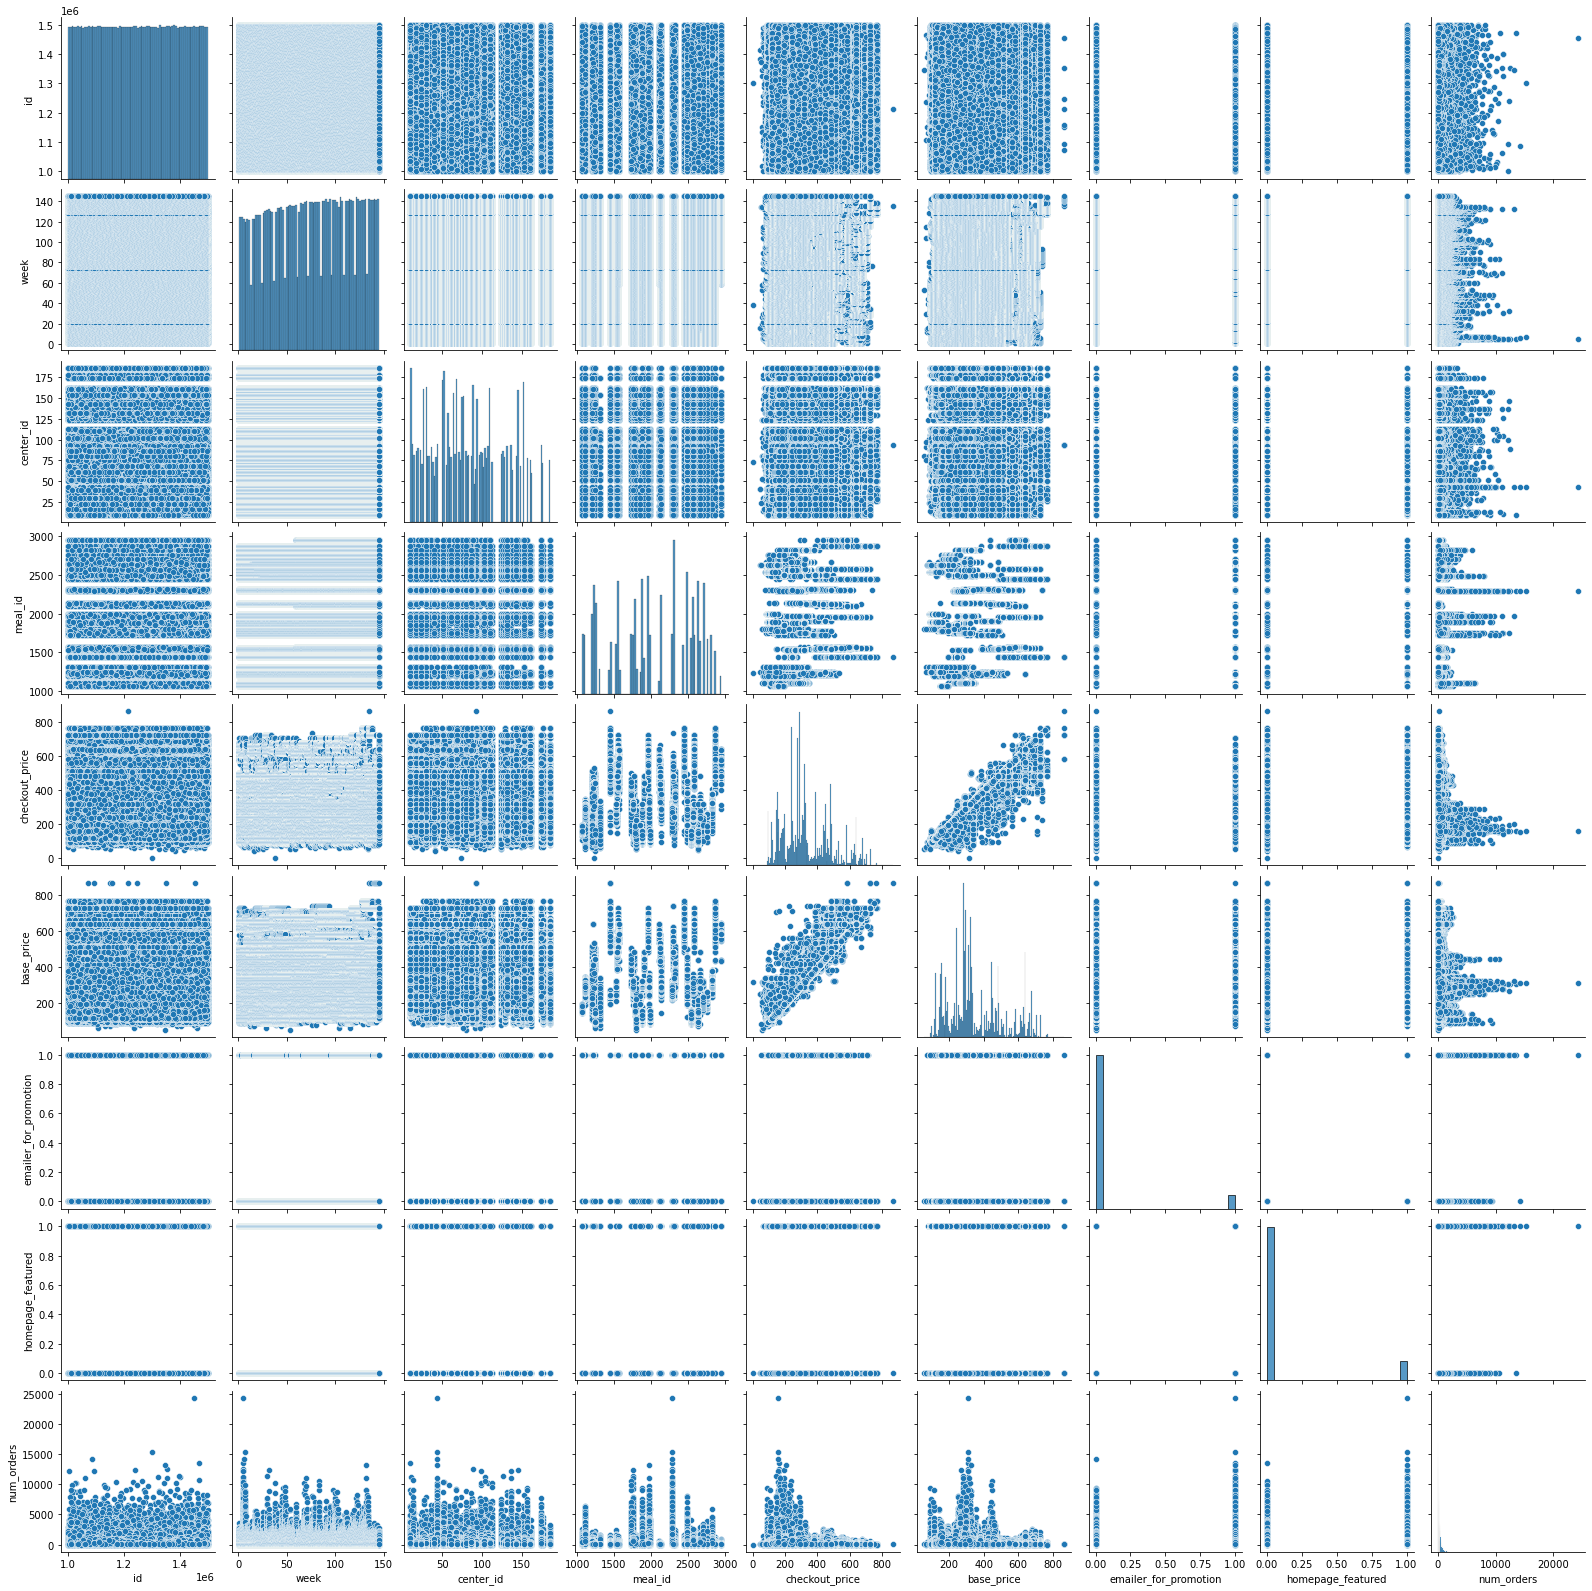

In [ ]:
#Explorando os tipos de relações em todo o conjunto de dados
sns.pairplot(dados_treino)

id      week  center_id   meal_id  \
id                     1.000000  0.002225   0.002641  0.000488   
week                   0.002225  1.000000  -0.003450  0.019814   
center_id              0.002641 -0.003450   1.000000  0.009893   
meal_id                0.000488  0.019814   0.009893  1.000000   
checkout_price         0.001941  0.026581   0.001348  0.010748   
base_price             0.002909  0.028614   0.000604  0.002605   
emailer_for_promotion  0.002001 -0.000841   0.013658  0.013402   
homepage_featured      0.003111 -0.008263  -0.005043  0.016354   
num_orders             0.000702 -0.017210  -0.053035  0.010597   

                       checkout_price  base_price  emailer_for_promotion  \
id                           0.001941    0.002909               0.002001   
week                         0.026581    0.028614              -0.000841   
center_id                    0.001348    0.000604               0.013658   
meal_id                      0.010748    0.002605               0.013402   
checkout_price               1.000000    0.953389               0.004818   
base_price                   0.953389    1.000000               0.171173   
emailer_for_promotion        0.004818    0.171173               1.000000   
homepage_featured           -0.057184    0.057156               0.390534   
num_orders                  -0.282108   -0.222306               0.277147   

                       homepage_featured  num_orders  
id                              0.003111    0.000702  
week                           -0.008263   -0.017210  
center_id                      -0.005043   -0.053035  
meal_id                         0.016354    0.010597  
checkout_price                 -0.057184   -0.282108  
base_price                      0.057156   -0.222306  
emailer_for_promotion           0.390534    0.277147  
homepage_featured               1.000000    0.294490  
num_orders                      0.294490    1.000000

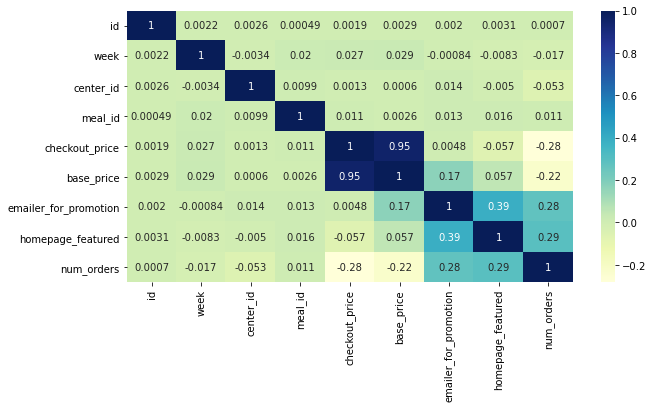

In [ ]:
#Calculando a correlação entre as variáveis
plt.figure(figsize=(10,5))
c= dados_treino.corr()
sns.heatmap(c,cmap="YlGnBu",annot=True)
c

Observa-se que as variáveis com maior correlação são base_price e checkout_price (0.95), isso faz sentido visto que o preço final é o preço base com desconto, impostos e taxa de entrega.

Outras correlações significativas são:
* emailer_for_promotion e homepage_featured: 0.39;
* num_order e homepage_featured: 0.29;
* num_order e emailer_for_promotion 0.28; e
* emailer_for_promotion e base_price: 0.17.

#### 4.5.2 Dividindo dados de treino e teste

In [ ]:
X = dados_treino.drop(['num_orders'], axis=1).values
y = dados_treino['num_orders'].values

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 5 Regressão Linear

In [ ]:
#Baixando a biblioteca e instanciando o algoritmo de regressão linear
from sklearn.linear_model import LinearRegression
modelo_rl = LinearRegression()  

### 5.1 Treinamento

In [ ]:
#Treinando o modelo de regressão linear
modelo_rl.fit(X_train, y_train)

LinearRegression()

### 5.2 Previsão

In [ ]:
#Predição com os dados de teste
y_pred_rl = modelo_rl.predict(X_test)

### 5.3 Visualização dos resultados

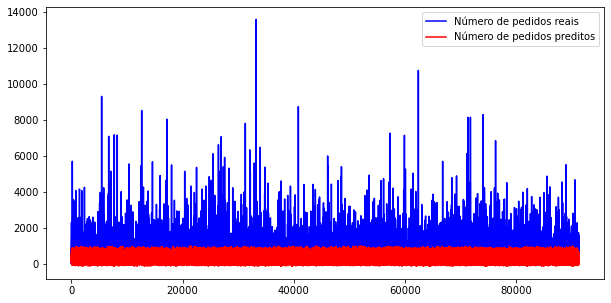

In [ ]:
#Gráfico para visualizar o número de pedidos real e os obtidos com o modelo
from matplotlib import pyplot
pyplot.figure(figsize=(10, 5))
pyplot.plot(y_test, color='blue', label="Número de pedidos reais")
pyplot.plot(y_pred_rl, color='red', label="Número de pedidos preditos")
pyplot.legend()
pyplot.show()

Observa-se que os valores preditos estão bem diferentes dos reais. O modelo não conseguiu abranger as variações de demanda, mantendo um padrão.

### 5.4 Avaliação dos resultados

Para avaliar os modelos desse projeto, por serem se regressão, serão utilizadas as seguintes métricas:
* o MAE que representa a diferença entre os valores originais e preditos extraídos pela média da diferença absoluta sobre o conjunto de dados;
* o MSE que representa a diferença entre os valores originais e previstos extraídos ao quadrado da diferença média sobre o conjunto de dados;
* o RMSE que é a taxa de erro pela raiz quadrada de MSE;
* o Score que varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. 

Para o MAE, MSE e RMSE quanto menor o valor, mais próximo o modelo está de acertar. Já para o Score, quanto maior esse valor, mais explicativo é o modelo.

In [ ]:
from sklearn import metrics
MAE_rl = metrics.mean_absolute_error(y_test, y_pred_rl)
MSE_rl = metrics.mean_squared_error(y_test, y_pred_rl)
RMSE_rl = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rl))
Score_rl = modelo_rl.score(X_test, y_test)
metricas_rl = (MAE_rl, MSE_rl, RMSE_rl, Score_rl)
pd.DataFrame(metricas_rl, index=["MAE", "MSE", "RMSE", "Score"], columns=["Regressão Linear"])

Regressão Linear
MAE          203.640457
MSE       122000.234079
RMSE         349.285319
Score          0.198821

Observa-se que o MAE, o RMSE e, principalmente, o MSE estão altos. O Score também está baixo. Tudo isso, juntamente com os resultados observados no gráfico, mostram que o modelo de regressão linear não está conseguindo predizer corretamente a demanda.

Assim, vamos ver se o modelo árvore de decisão apresenta um desempenho melhor.

## 6 Árvore de decisão

In [ ]:
#Baixando a biblioteca e instanciando o algoritmo de árvore de decisão
from sklearn.tree import DecisionTreeRegressor
modelo_arvore = DecisionTreeRegressor()

### 6.1 Treinamento

In [ ]:
#Treinando o modelo de árvore de decisão
modelo_arvore.fit(X_train, y_train)

DecisionTreeRegressor()

### 6.2 Previsão¶

In [ ]:
#Predição com os dados de teste
y_pred_arvore = modelo_arvore.predict(X_test)

### 6.3 Visualização dos resultados

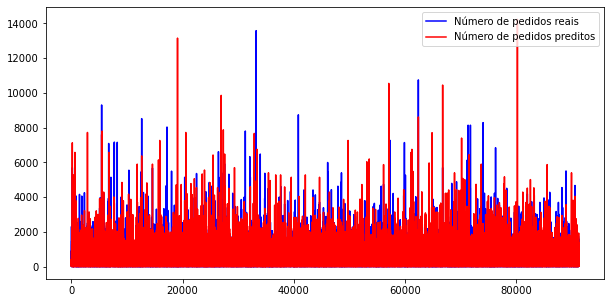

In [ ]:
#Gráfico para visualizar o número de pedidos real e os obtidos com o modelo
pyplot.figure(figsize=(10, 5))
pyplot.plot(y_test, color='blue', label="Número de pedidos reais")
pyplot.plot(y_pred_arvore, color='red', label="Número de pedidos preditos")
pyplot.legend()
pyplot.show()

Observa-se que os valores preditos estão mais próximos dos reais, porém em alguns pontos eles aumentou muito a demanda.

### 6.4 Avaliação dos resultados

In [ ]:
MAE_arvore = metrics.mean_absolute_error(y_test, y_pred_arvore)
MSE_arvore = metrics.mean_squared_error(y_test, y_pred_arvore)
RMSE_arvore = np.sqrt(metrics.mean_squared_error(y_test, y_pred_arvore))
Score_arvore = modelo_arvore.score(X_test, y_test)
metricas_arvore = (MAE_arvore, MSE_arvore, RMSE_arvore, Score_arvore)
pd.DataFrame(metricas_arvore, index=["MAE", "MSE", "RMSE", "Score"], columns=["Árvore de decisão"])

Árvore de decisão
MAE           103.715091
MSE         58054.889793
RMSE          240.945823
Score           0.618752

In [ ]:
pd.DataFrame(metricas_rl, index=["MAE", "MSE", "RMSE", "Score"], columns=["Regressão Linear"])

Regressão Linear
MAE          203.640457
MSE       122000.234079
RMSE         349.285319
Score          0.198821

Observa-se que em comparação ao modelo de regressão linear, a árvore de decisão teve um resultado um pouco melhor no MAE, MSE e RMSE. De qualquer forma, os valores dessas métricas continuam altos. Por outro lado, o Score teve uma melhora significativa. Dessa forma, esse modelo apresentou uma melhora no desempenho, mas ainda apresenta muitos erros que impactam na predição correta da demanda.

Assim, vamos ver se o modelo random forest, que cria várias arvóres de decisão, apresenta um desempenho melhor.

## 7 Random Forest

In [ ]:
#Baixando a biblioteca e instanciando o algoritmo de random forest
from sklearn.ensemble import RandomForestRegressor
modelo_rf = RandomForestRegressor()

### 7.1 Treinamento¶

In [ ]:
#Treinando o modelo de random forest
modelo_rf.fit(X_train, y_train)

RandomForestRegressor()

### 7.2 Previsão¶

In [ ]:
#Predição com os dados de teste
y_pred_rf = modelo_rf.predict(X_test)

### 7.3 Visualização dos resultados

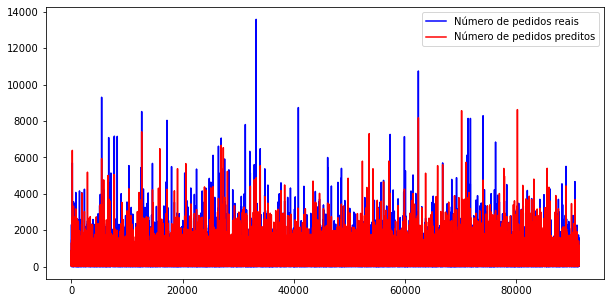

In [ ]:
#Gráfico para visualizar o número de pedidos real e os obtidos com o modelo
pyplot.figure(figsize=(10, 5))
pyplot.plot(y_test, color='blue', label="Número de pedidos reais")
pyplot.plot(y_pred_rf, color='red', label="Número de pedidos preditos")
pyplot.legend()
pyplot.show()

### 7.4 Avaliação dos resultados¶

In [ ]:
MAE_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
MSE_rf = metrics.mean_squared_error(y_test, y_pred_rf)
RMSE_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
Score_rf = modelo_rf.score(X_test, y_test)
metricas_rf = (MAE_rf, MSE_rf, RMSE_rf, Score_rf)
pd.DataFrame(metricas_rf, index=["MAE", "MSE", "RMSE", "Score"], columns=["Random forest"])

Random forest
MAE        77.673256
MSE     31268.856998
RMSE      176.830023
Score       0.794656

In [ ]:
pd.DataFrame(metricas_arvore, index=["MAE", "MSE", "RMSE", "Score"], columns=["Árvore de decisão"])

Árvore de decisão
MAE           103.715091
MSE         58054.889793
RMSE          240.945823
Score           0.618752

Observa-se que em comparação ao modelo de árvore de decisão, o random forest teve um resultado melhor no MAE, MSE e RMSE, mas os valores continuam altos. O Score também aumentou um pouco. Portanto, o modelo apresentou uma melhora no desempenho, mas a previsão realizada ainda não está confiável.

Assim, vamos ver se o modelo XGboost, que também é baseado em árvores de decisão e utiliza uma estrutura de Gradient boosting, apresenta um desempenho melhor.

## 8 Algoritmo XGBoost

In [ ]:
!pip install xgboost
import xgboost as xgb

In [ ]:
#Instanciando o modelo do XGBoost
modelo_xgb = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

Observação: Estava utilizando objective="reg:linear", mas apareceu esse erro:

[13:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.

Por isso, alterei para objective="reg:squarederror".

### 8.1 Treinamento

In [ ]:
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### 8.2 Previsão

In [ ]:
y_pred_xgb = modelo_xgb.predict(X_test)

### 8.3 Visualização dos resultados

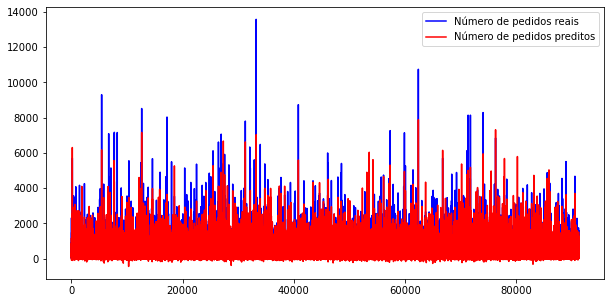

In [ ]:
#Gráfico para visualizar o número de pedidos real e os obtidos com o modelo
pyplot.figure(figsize=(10, 5))
pyplot.plot(y_test, color='blue', label="Número de pedidos reais")
pyplot.plot(y_pred_xgb, color='red', label="Número de pedidos preditos")
pyplot.legend()
pyplot.show()

### 8.4 Avaliação dos resultados

In [ ]:
MAE_xgb = metrics.mean_absolute_error(y_test, y_pred_xgb)
MSE_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)
RMSE_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
Score_xgb = modelo_xgb.score(X_test, y_test)
metricas_xgb = (MAE_xgb, MSE_xgb, RMSE_xgb, Score_xgb)
pd.DataFrame(metricas_xgb, index=["MAE", "MSE", "RMSE", "Score"], columns=["XGBoost"])

XGBoost
MAE       92.091328
MSE    29481.891602
RMSE     171.702917
Score      0.806391

In [ ]:
pd.DataFrame(metricas_rf, index=["MAE", "MSE", "RMSE", "Score"], columns=["Random forest"])

Random forest
MAE        77.673256
MSE     31268.856998
RMSE      176.830023
Score       0.794656

Observa-se que em comparação ao modelo de random forest, o XGBoost teve um resultado melhor no MSE e RMSE, mas o MAE aumentou. O Score também aumentou um pouco. Portanto, pode-se considerar que o modelo teve uma pequena melhora de desempenho em relação ao random forest, mas ainda precisa ser ajustado para diminuir a quantidade de erros.

## 9 Avaliando desempenho dos modelos

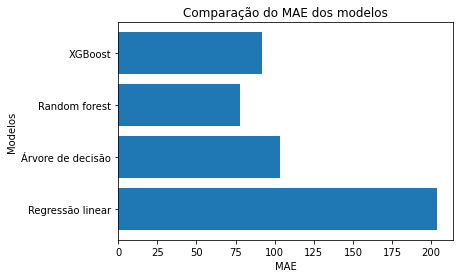

In [ ]:
modelos = ['Regressão linear', 'Árvore de decisão', 'Random forest', 'XGBoost']
mae = [MAE_rl, MAE_arvore, MAE_rf, MAE_xgb]
plt.barh(modelos, mae)
plt.ylabel("Modelos")
plt.xlabel("MAE")
plt.title("Comparação do MAE dos modelos")
plt.show()

Em relação ao MAE, o random forest foi o que apresentou melhor desempenho, ou seja, a menor diferença entre os valores originais e preditos extraídos pela média da diferença absoluta sobre o conjunto de dados. Assim, esse modelo foi o mais próximo de acertar a previsão, seguido pelo XGBoost.

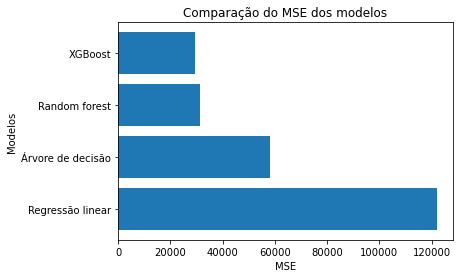

In [ ]:
modelos = ['Regressão linear', 'Árvore de decisão', 'Random forest', 'XGBoost']
mse = [MSE_rl, MSE_arvore, MSE_rf, MSE_xgb]
plt.barh(modelos, mse)
plt.ylabel("Modelos")
plt.xlabel("MSE")
plt.title("Comparação do MSE dos modelos")
plt.show()

Em relação so MSE, o XGBoost foi o que apresentou melhor desempenho, ou seja,  a menor diferença entre os valores originais e previstos extraídos ao quadrado da diferença média sobre o conjunto de dados. Assim, esse modelo foi o mais próximo de acertar a previsão, seguido pelo random forest com uma pequena diferença.

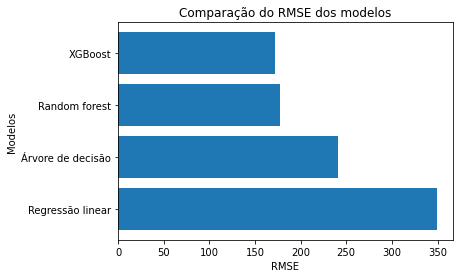

In [ ]:
modelos = ['Regressão linear', 'Árvore de decisão', 'Random forest', 'XGBoost']
rmse = [RMSE_rl, RMSE_arvore, RMSE_rf, RMSE_xgb]
plt.barh(modelos, rmse)
plt.ylabel("Modelos")
plt.xlabel("RMSE")
plt.title("Comparação do RMSE dos modelos")
plt.show()

Em relação so RMSE, o XGBoost foi o que apresentou melhor desempenho, ou seja,  a menor taxa de erro pela raiz quadrada de MSE. Assim, esse modelo foi o mais próximo de acertar a previsão, seguido pelo random forest com uma pequena diferença.

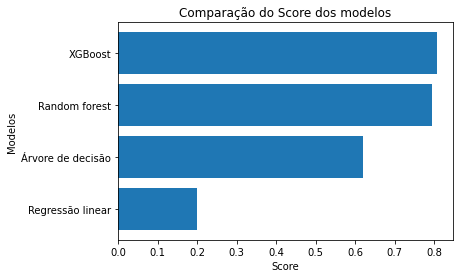

In [ ]:
modelos = ['Regressão linear', 'Árvore de decisão', 'Random forest', 'XGBoost']
score = [Score_rl, Score_arvore, Score_rf, Score_xgb]
plt.barh(modelos, score)
plt.ylabel("Modelos")
plt.xlabel("Score")
plt.title("Comparação do Score dos modelos")
plt.show()

Por fim, o modelo que apresentou maior Score foi o XGBoost, o que significa que ele é o modelo que mais consegue explicar os valores observados.

### 9.1 Considerações finais

De forma geral, observou-se que o XGBoost obteve um desempenho melhor na maioria das métricas, porém o random forest também apresentou resultados bem próximos, superando o XGBoost no MAE. Assim, esses dois modelos demonstraram ser os melhores para a resolução do problema desse projeto, mas ainda é necessário ajustar o modelo a fim de reduzir os erros e aproximar mais o Score a 1.

Para concluir, utilizaremos esses dois modelos para prever a demanda futura utilizando o dataset dados_teste, que não possuem a coluna 'num_orders'.

## 10 Prevendo a demanda futura

In [ ]:
#Definindo novo dataset de teste
X_test = dados_teste.values

### 10.1 Utilizando o modelo Random Forest

In [ ]:
#Prevendo a demanda das próximas semanas
y_pred_teste_rf = modelo_rf.predict(X_test)

In [ ]:
y_pred_teste_rf = pd.DataFrame(y_pred_teste_rf)

In [ ]:
previsao_demanda_rf = pd.merge(dados_teste, y_pred_teste_rf, left_index=True, right_index=True, how='inner')

In [ ]:
previsao_demanda_rf['num_orders'] = previsao_demanda_rf[0]

In [ ]:
previsao_demanda_rf = previsao_demanda_rf.drop([0], axis=1)

In [ ]:
pedidos_previsao_rf = previsao_demanda_rf.groupby(['week'])['num_orders'].sum()
pedidos_previsao_rf = pd.DataFrame(pedidos_previsao_rf)
pedidos_previsao_rf

num_orders
week            
146    711618.51
147    881562.82
148    756360.70
149    791679.97
150   1043307.69
151   1016164.81
152    977489.38
153    930633.01
154    897831.77
155    885046.96

In [ ]:
plot_data = [
    go.Scatter(
        x=pedidos_por_semana.index,
        y=pedidos_por_semana['num_orders'],
        name='Série histórica de pedidos',
        marker = dict(color = 'Blue')
    ),
    go.Scatter(
        x=pedidos_previsao_rf.index,
        y=pedidos_previsao_rf['num_orders'],
        name='Previsão Random Forest',
        marker = dict(color = 'Red')
    )
]
plot_layout = go.Layout(
        title='Total de pedidos por semana',
        yaxis_title='Total de pedidos',
        xaxis_title='Semana',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

### 10.2 Utilizando o modelo XGBoost

In [ ]:
#Prevendo a demanda das próximas semanas
y_pred_teste_xgb = modelo_xgb.predict(X_test)

In [ ]:
y_pred_teste_xgb = pd.DataFrame(y_pred_teste_xgb)

In [ ]:
previsao_demanda_xgb = pd.merge(dados_teste, y_pred_teste_xgb, left_index=True, right_index=True, how='inner')

In [ ]:
previsao_demanda_xgb['num_orders'] = previsao_demanda_xgb[0]

In [ ]:
previsao_demanda_xgb = previsao_demanda_xgb.drop([0], axis=1)

In [ ]:
pedidos_previsao_xgb = previsao_demanda_xgb.groupby(['week'])['num_orders'].sum()
pedidos_previsao_xgb = pd.DataFrame(pedidos_previsao_xgb)
pedidos_previsao_xgb

num_orders
week             
146   671759.2500
147   792662.5625
148   707970.8125
149   741529.5000
150   971240.1250
151   950165.0000
152   925248.2500
153   880656.1875
154   815832.3750
155   798430.1250

In [ ]:
plot_data = [
    go.Scatter(
        x=pedidos_por_semana.index,
        y=pedidos_por_semana['num_orders'],
        name='Série histórica de pedidos',
        marker = dict(color = 'Blue')
    ),
    go.Scatter(
        x=pedidos_previsao_xgb.index,
        y=pedidos_previsao_xgb['num_orders'],
        name='Previsão XGBoost',
        marker = dict(color = 'Red')
    )
]
plot_layout = go.Layout(
        title='Total de pedidos por semana',
        yaxis_title='Total de pedidos',
        xaxis_title='Semana',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

### 10.3 Comparação dos resultados

In [ ]:
previsoes = pd.merge(pedidos_previsao_rf, pedidos_previsao_xgb, how='inner', on='week')
previsoes = previsoes.rename(columns={'num_orders_x':'Previsao_Random_Forest', 'num_orders_y':'Previsao_XGBoost'})
previsoes

Previsao_Random_Forest  Previsao_XGBoost
week                                          
146                711618.51       671759.2500
147                881562.82       792662.5625
148                756360.70       707970.8125
149                791679.97       741529.5000
150               1043307.69       971240.1250
151               1016164.81       950165.0000
152                977489.38       925248.2500
153                930633.01       880656.1875
154                897831.77       815832.3750
155                885046.96       798430.1250

In [ ]:
plot_data = [
    go.Scatter(
        x=previsoes.index,
        y=previsoes['Previsao_Random_Forest'],
        name='Previsão Random Forest',
        marker = dict(color = 'Blue')
    ),
    go.Scatter(
        x=previsoes.index,
        y=previsoes['Previsao_XGBoost'],
        name='Previsão XGBoost',
        marker = dict(color = 'Red')
    )
]
plot_layout = go.Layout(
        title='Previsão de demanda de pedidos',
        yaxis_title='Total de pedidos',
        xaxis_title='Semana',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

## 11 Conclusão

Esse projeto tinha como objetivo encontrar um modelo capaz de prever a demanda de uma empresa de entrega de comida, a fim de ajudá-la em seu planejamento. Foram testados quatro algoritmos, sendo que o Random Forest e o XGBoost foram os que apresentaram melhores resultados. Por causa disso, os modelos treinados desses algoritmos foram utilizados para realizar as previsões de demanda das semanas 146 a 155, com o dataset dados_teste, e os resultados obtidos pelo Random Forest foram maiores que os do XGBoost. Visto que trata-se de uma previsão, o modelo utilizando o Random Forest representa um cenário mais otimista e o XGBoost, mais conservador. Assim, a empresa pode utilizar a média das duas para se planejar em um primeiro momento e observar como a demanda real se aproxima das duas curvas durante as primeiras semanas. A partir dessa análise, a demanda futura pode ser baseada na curva mais parecida. 

## Referências

Base de dados utilizada: https://www.kaggle.com/ghoshsaptarshi/av-genpact-hack-dec2018

Conheça o algoritmo XGBoost: https://www.datageeks.com.br/xgboost/#:~:text=O%20XGBoost%20%C3%A9%20um%20algoritmo%20de%20aprendizado%20de,a%20superar%20todos%20os%20outros%20algoritmos%20ou%20frameworks.

Gráficos de barra com matplotlib: https://medium.com/horadecodar/gr%C3%A1ficos-de-barra-com-matplotlib-85628bfc4351

Prevendo a demanda de alugueis de bicicletas com Machine Learning:
https://minerandodados.com.br/prevendo-a-demanda-de-alugueis-de-bicicletas-com-machine-learning/
https://www.youtube.com/watch?v=m8FrAx42okI

Projeto Kaggle - Getting started with Demand Forecasting: https://www.kaggle.com/sreshta140/getting-started-with-demand-forecasting

Regression Accuracy Check in Python (MAE, MSE, RMSE, R-Squared): https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html


